<a href="https://colab.research.google.com/github/Jsadain/Capstone_CIND820/blob/main/Loan_sanction_codefile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading all the libraries and reading the data from a CSV file into a dataframe.  

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
PATH = 'https://raw.githubusercontent.com/Jsadain/Capstone_CIND820/main/loan_sanction_dataset.csv'
df = pd.read_csv(PATH)

In [184]:
df.head() #viewing the initial 5 rows of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [185]:
#describing statistics for the dataset

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


The above code shows that the datset has 614 rows and 13 variables columns. there are 8 object variables that refer to categorical variables, one integer varible that is numerical and 4 float64 variables that are also numerical but has decimal values in it. The code also shows descriptive statistics of its main numerical variables that are Applicant Income, Coaaplicant Income, LoanAmount,Loan_Amount_Term, and credit history.

<Axes: xlabel='Loan_Status', ylabel='count'>

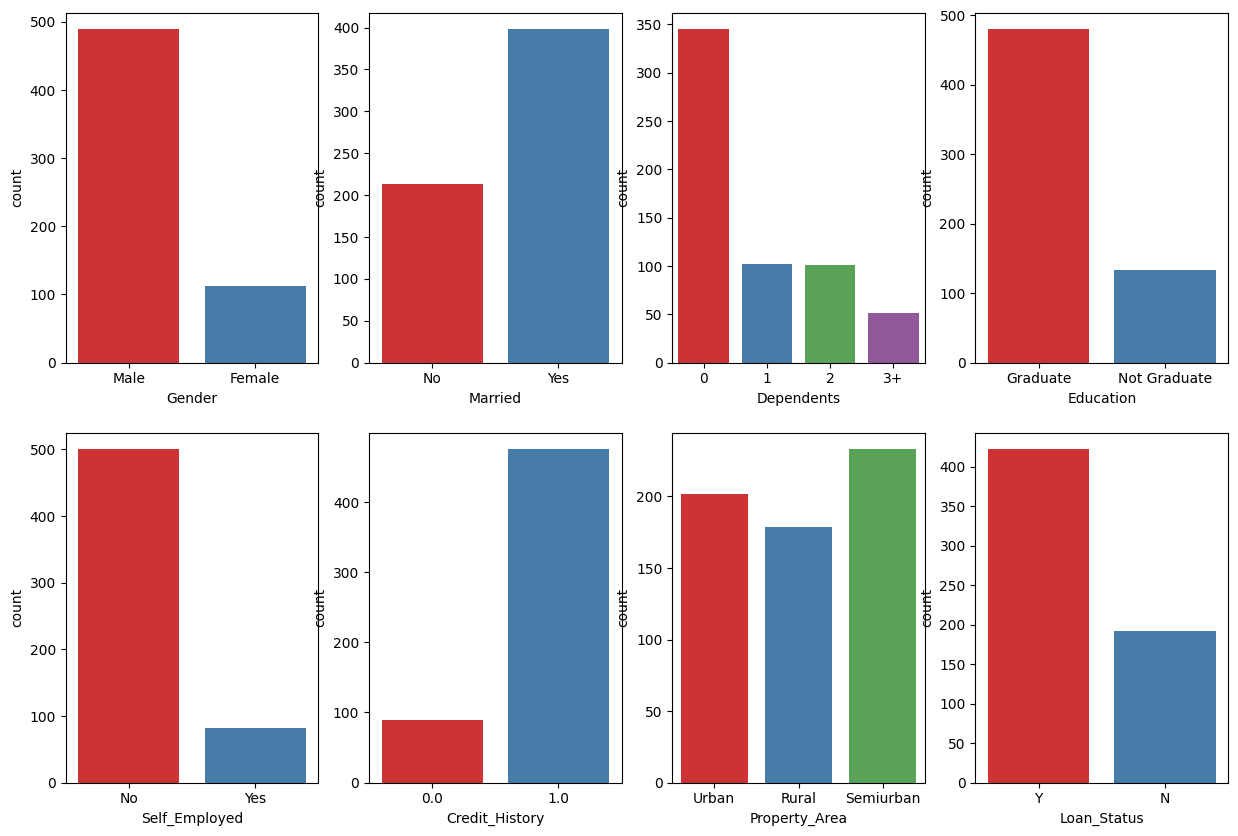

In [186]:
#univariate analysis and visualizations for categorical variables

plt.figure(figsize = (15,10))
plt.subplot(2,4,1)
sns.countplot(x = 'Gender', palette = 'Set1', data = df)
plt.subplot(2,4,2)
sns.countplot(x = 'Married', palette = 'Set1', data = df)
plt.subplot(2,4,3)
sns.countplot(x = 'Dependents', palette = 'Set1', data = df)
plt.subplot(2,4,4)
sns.countplot(x = 'Education', palette = 'Set1', data = df)
plt.subplot(2,4,5)
sns.countplot(x = 'Self_Employed', palette = 'Set1', data = df)
plt.subplot(2,4,6)
sns.countplot(x = 'Credit_History', palette = 'Set1', data = df)
plt.subplot(2,4,7)
sns.countplot(x = 'Property_Area', palette = 'Set1', data = df)
plt.subplot(2,4,8)
sns.countplot(x = 'Loan_Status', palette = 'Set1', data = df)

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.
From the obove visualzations we can make the following inferences:
1. around 80 % of applicants are male.
2. about 65% of the applicants are married and most of the applicants donot have dependents.
3. We have higher number of applicants who are graduated and are not self employed.
4. credit history for some applicants is not available.
5. the highest number of applicants are from the semiurban area.
6. about 75% of the loans get approved and 25% loans are rejected.



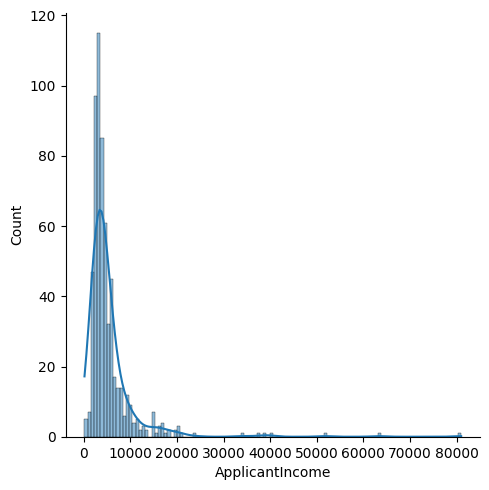

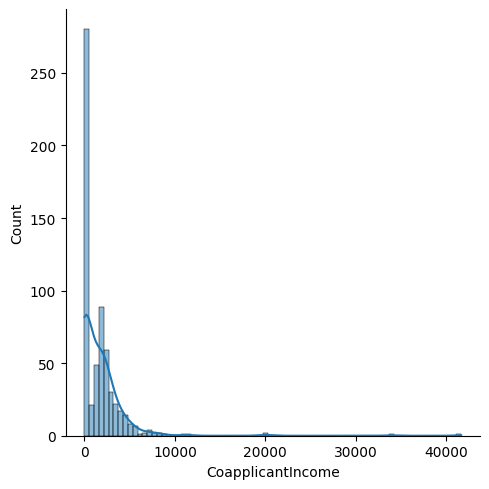

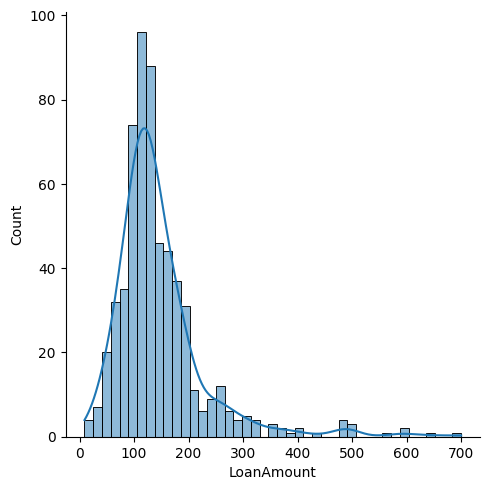

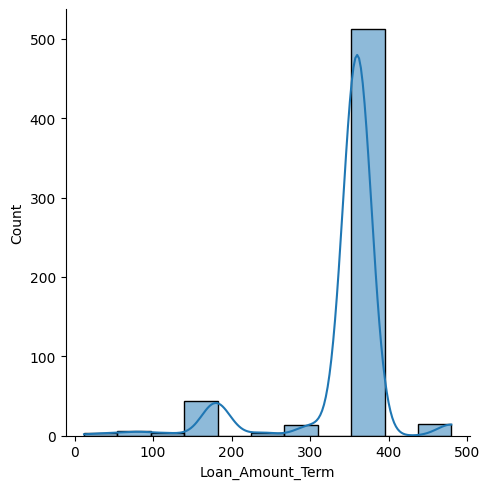

In [187]:
#univariate analysis of numerical variables.

sns.displot(df['ApplicantIncome'], kind="hist",kde="TRUE")
sns.displot(df['CoapplicantIncome'], kind="hist",kde="TRUE")
sns.displot(df['LoanAmount'], kind= "hist", kde="TRUE")
sns.displot(df['Loan_Amount_Term'], kind="hist",kde="TRUE")

 For numerical features, probability density plots can be used to look at the distribution of the variable.
 here we can see that none of our numerical attribute is normally distributed.the ApplicantIncome and CoapplicantIncome variable is right skewed and so LoanAmount variable follows a better distribution than the earlier two. while the Loan_Amount_term is left skewed and as our distributions are not normal distributions, cannot use the Z-score method for outliers. infact three of so we will use the IQR method to treat with outliers.


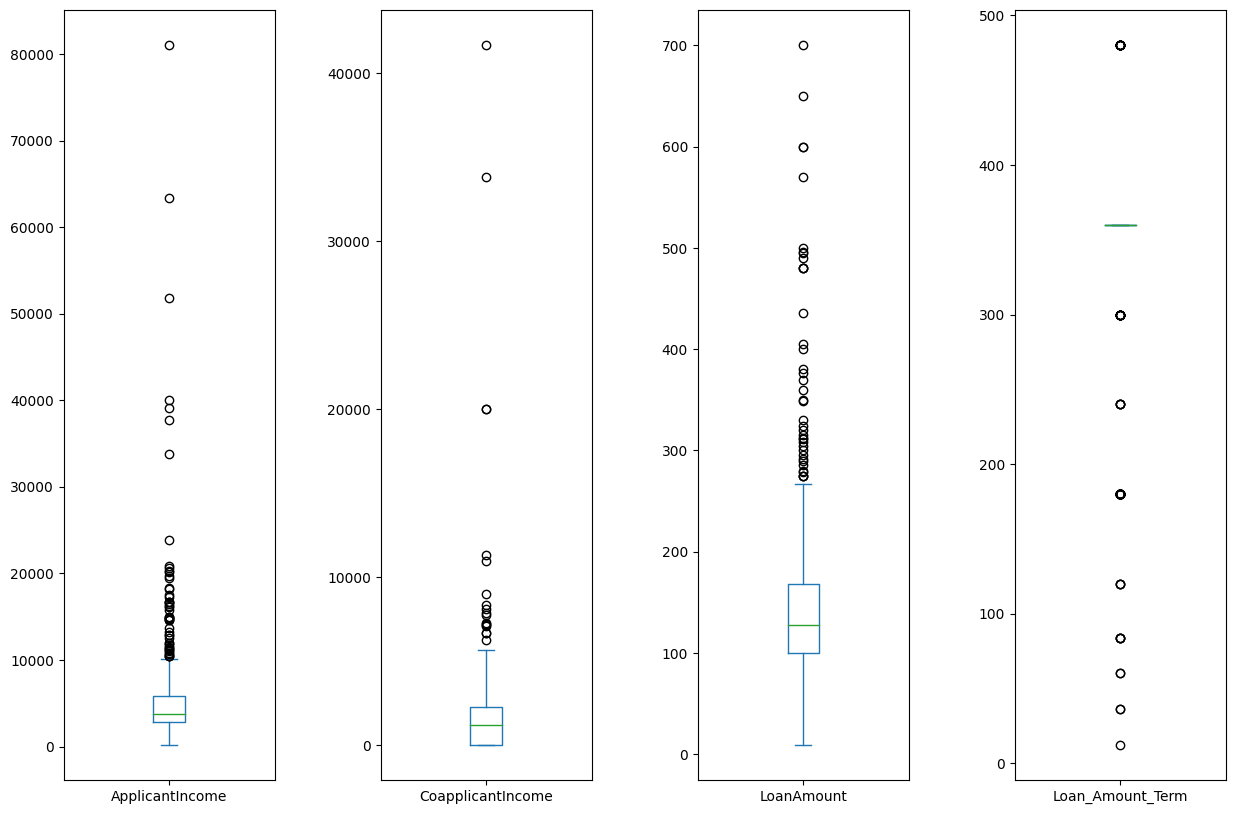

In [188]:
#detecting outliers
df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15, 10)
)
# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()


The figures above show that we have outliers present in the data. The ApplicantIncome variable outliers can possibly be due to the fact that different peoplemake different incomes in a month and do their spouses or coapplicants. LoanAmount attribute also has outliers because the higher the income of an applicant is, the higher Loan he can apply for and the higher the amount of loan, the higher will be the term granted to pay off the loan.

<Axes: xlabel='Credit_History', ylabel='count'>

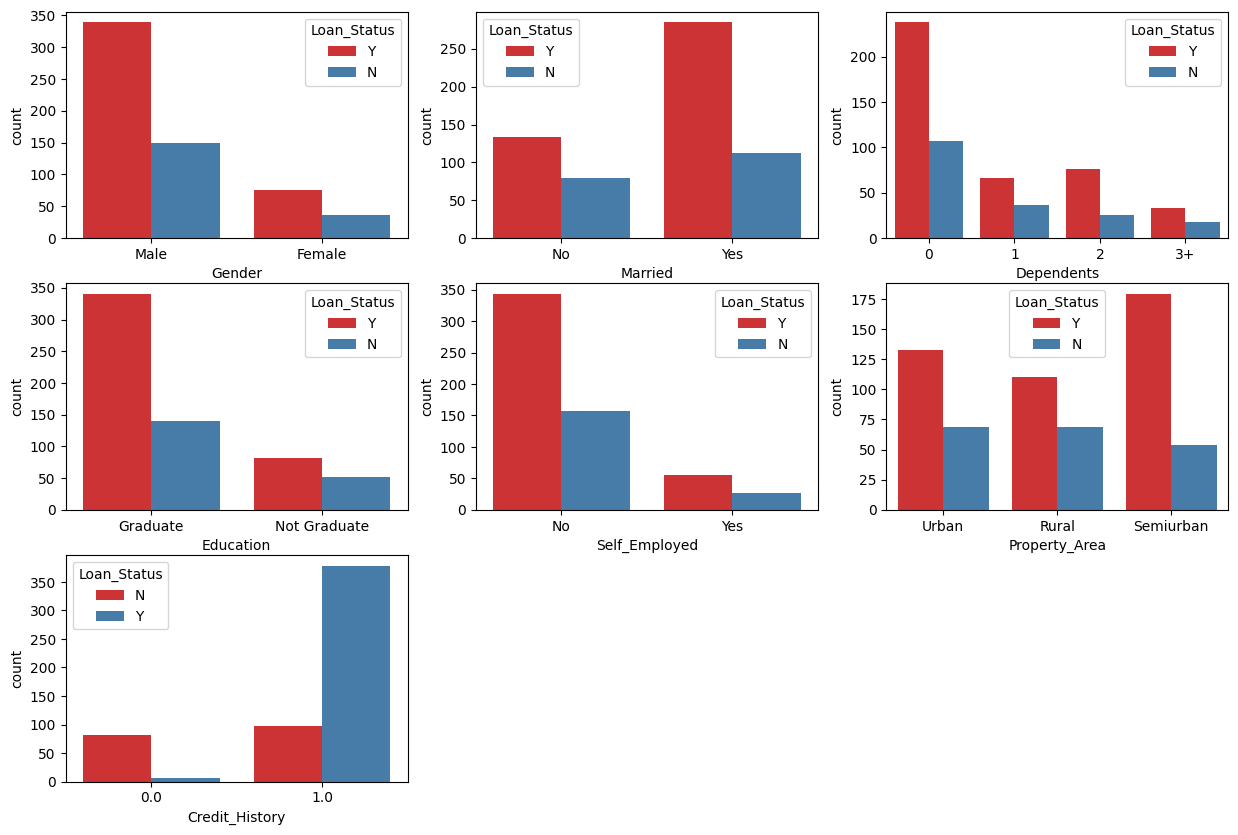

In [189]:
#bivariate analysis and visualizations
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.countplot(x = 'Gender', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(3,3,2)
sns.countplot(x = 'Married', hue = 'Loan_Status',palette = 'Set1', data = df)
plt.subplot(3,3,3)
sns.countplot(x = 'Dependents', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(3,3,4)
sns.countplot(x = 'Education', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(3,3,5)
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(3,3,6)
sns.countplot(x = 'Property_Area', hue = 'Loan_Status', palette = 'Set1', data = df)
plt.subplot(3,3,7)
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', palette = 'Set1', data = df)


The visualization shows comparing each attribute with respect to our target variable that is : "Loan_Status".
By visualizing the above plots there these inferences can be deduced:

1. Married applicants tend to get more loan applications approved.
2. Applicants from semiurban areas have the highest chance of getting their applications approved.
3. People who have paid off their debts earlier and have meet the criterion of a good credit history are more likely to get their applications approved.


Introducing a new dummy variable in our dataset: Total Income = applicant Income + co-applicant Income.

This is to check whether the likeliness of loan approval has anything to do with a family's total income or not.  

In [190]:
newdf = df.copy()
newdf['TotalIncome'] = newdf['ApplicantIncome'] + newdf['CoapplicantIncome']

Visualizing total income of a family and the loan status.

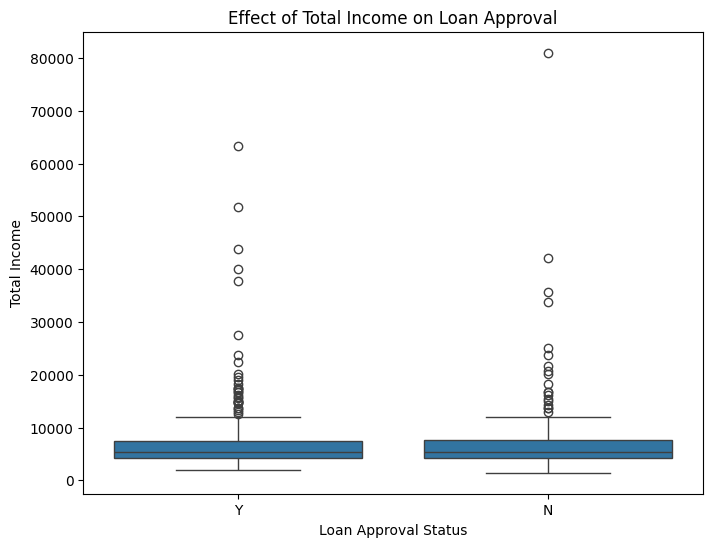

In [191]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='TotalIncome', data=newdf)
plt.xlabel('Loan Approval Status')
plt.ylabel('Total Income')
plt.title('Effect of Total Income on Loan Approval')
plt.show()

<Axes: >

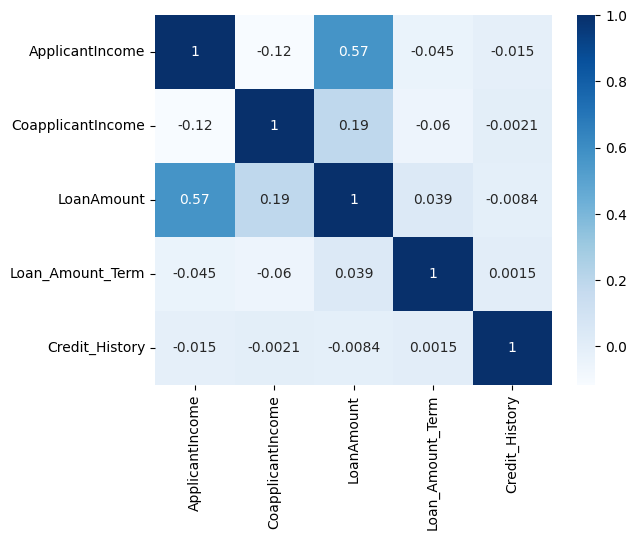

In [192]:
corr = df.corr()
sns.heatmap(corr,cmap="Blues",annot=True)

The correlation matrix for numerical variables shows that there is a somewhat correleation between the applicant and coapplicants income and loan amount.

let us see if our data has any missing values. lets visualize them so we can know which statistic to use for imputation. but first in order to plot the null values along with other values we need to fill in missing values with "NA".

In [193]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

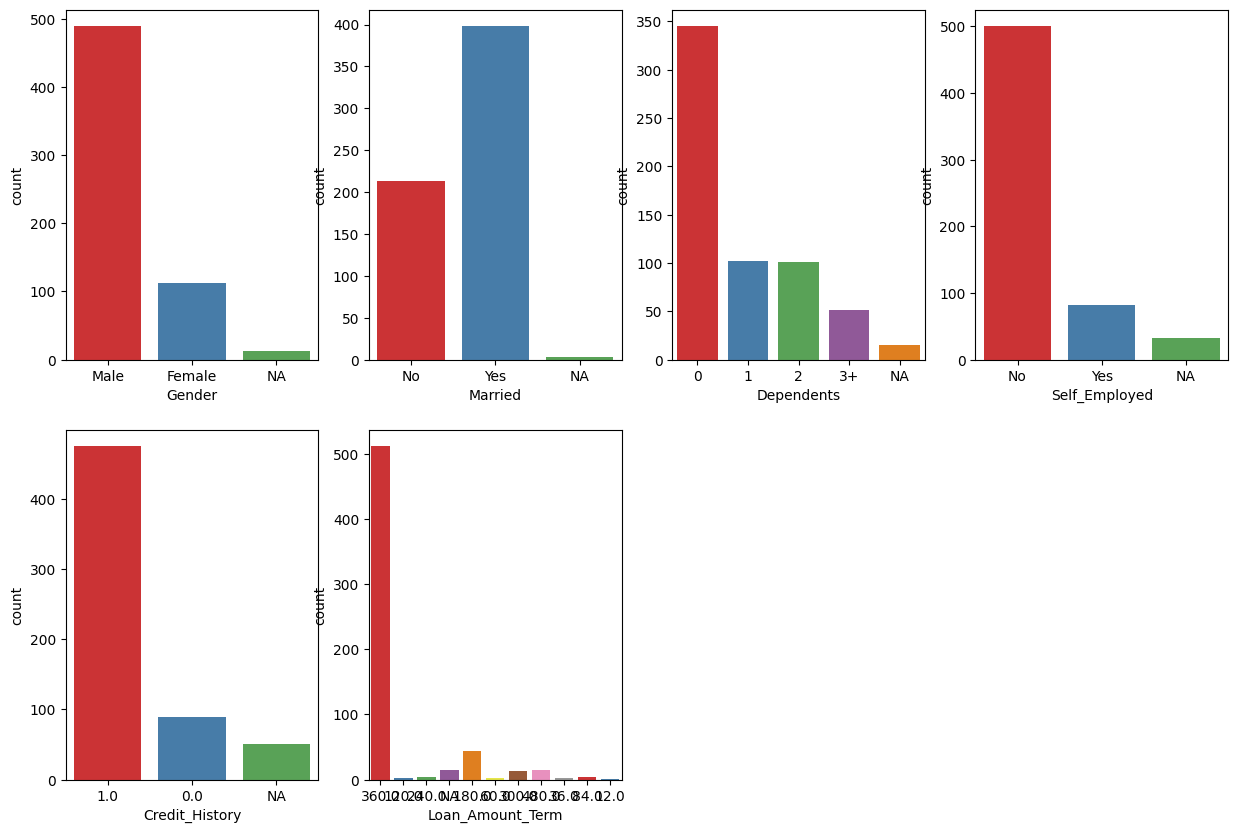

In [194]:
#dealing with missing values
df_copy = df.fillna("NA")
plt.figure(figsize = (15,10))
plt.subplot(2,4,1)
sns.countplot(x = 'Gender', palette = 'Set1', data = df_copy)
plt.subplot(2,4,2)
sns.countplot(x = 'Married', palette = 'Set1', data = df_copy)
plt.subplot(2,4,3)
sns.countplot(x = 'Dependents', palette = 'Set1', data = df_copy)
plt.subplot(2,4,4)
sns.countplot(x = 'Self_Employed', palette = 'Set1', data = df_copy)
plt.subplot(2,4,5)
sns.countplot(x = 'Credit_History', palette = 'Set1', data = df_copy)
plt.subplot(2,4,6)
sns.countplot(x = 'Loan_Amount_Term', palette = 'Set1', data = df_copy)

From the above visualzation swe can say that it is best to fill categorical data with mode as it is the highest occuring value nd for LoanAmount we will use median instaed of mean because there are some outliers in this data and mean is very sensitive to outliers so imputing missing values with median seems a good option.

In [195]:
# imputing values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

#for loan_amount we will use median instaed of mean to fill in the missing values
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

#checking any null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

now that we donot have any null values, let us deal with the outliers. for that we will be using the IQR(inter quartile range) method. IQR = Q1 = df.quantile(0.25) ,Q3 = df.quantile(0.75), IQR = Q3 - Q1.
After calculating first and third quartile, we iwll calculate the Upper limit and lower limit for each variable and then replace the outlier values with these limits. this is called the capping method. we donot want to use the trimming method because this will make us loose the data.

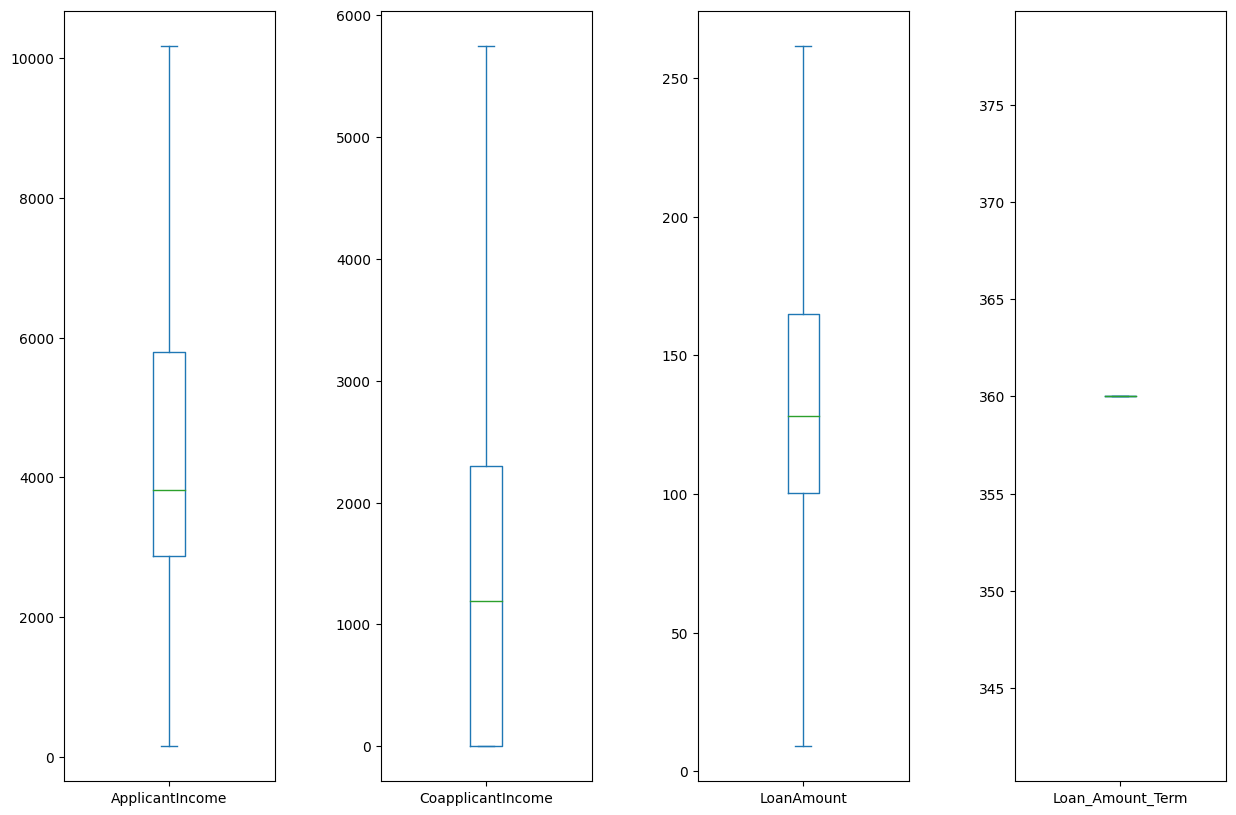

In [196]:
AI_Q1 = df['ApplicantIncome'].quantile(0.25)
AI_Q3 = df['ApplicantIncome'].quantile(0.75)
AI_IQR = AI_Q3 - AI_Q1   #interquartile range for ApplicantIncome
AI_UL = AI_Q3 + 1.5 * AI_IQR  #calculating upperlimit for applicantincome
AI_LL = AI_Q1 - 1.5 * AI_IQR  #calculating lower limit for ApplicantIncome

CI_Q1 = df['CoapplicantIncome'].quantile(0.25)
CI_Q3 = df['CoapplicantIncome'].quantile(0.75)
CI_IQR = CI_Q3 - CI_Q1   #interquartile range for CoapplicantIncome
CI_UL = CI_Q3 + 1.5 * CI_IQR  #calculating upperlimit for Coapplicantincome
CI_LL = CI_Q1 - 1.5 * CI_IQR  #calculating lower limit for CoApplicantIncome

LA_Q1 = df['LoanAmount'].quantile(0.25)
LA_Q3 = df['LoanAmount'].quantile(0.75)
LA_IQR = LA_Q3 - LA_Q1   #interquartile range for LoanAmount
LA_UL = LA_Q3 + 1.5 * LA_IQR  #calculating upperlimit for LoanAmount
LA_LL = LA_Q1 - 1.5 * LA_IQR  #calculating lower limit for LoanAmount

LAT_Q1 = df['Loan_Amount_Term'].quantile(0.25)
LAT_Q3 = df['Loan_Amount_Term'].quantile(0.75)
LAT_IQR = LAT_Q3 - LAT_Q1   #interquartile range for Loan_Amount_Term
LAT_UL = LAT_Q3 + 1.5 * LAT_IQR  #calculating upperlimit for Loan_Amount_Term
LAT_LL = LAT_Q1 - 1.5 * LAT_IQR  #calculating lower limit for Loan_Amount_Term

df['ApplicantIncome'] = np.where(
    df['ApplicantIncome'] > AI_UL,
    AI_UL,
    np.where(
        df['ApplicantIncome'] < AI_LL,
        AI_LL,
        df['ApplicantIncome']
    )
)
df['CoapplicantIncome'] = np.where(
    df['CoapplicantIncome'] > CI_UL,
    CI_UL,
    np.where(
        df['CoapplicantIncome'] < CI_LL,
        CI_LL,
        df['CoapplicantIncome']
    )
)
df['LoanAmount'] = np.where(
    df['LoanAmount'] > LA_UL,
    LA_UL,
    np.where(
        df['LoanAmount'] < LA_LL,
        LA_LL,
        df['LoanAmount']
    )
)
df['Loan_Amount_Term'] = np.where(
    df['Loan_Amount_Term'] > LAT_UL,
    LAT_UL,
    np.where(
        df['Loan_Amount_Term'] < LAT_LL,
        LAT_LL,
        df['Loan_Amount_Term']
    )
)
df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].plot(
    kind='box',
    subplots=True,
    sharey=False,
    figsize=(15, 10)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5)
plt.show()



Boxplots to show that there are no outliers in our data now.

Now we will drop the Loan_Id column as it is of no use to us. its probably just a unique number to represent each application.
As our dataset has categorical variables, we will change it because many machine learning algorithms can not work directly on labeled data. we need numerical data to build our models so we will use **One-Hot encoding method** to achieve this. we are using one-hot encoding for converting categorical variables. we are not using label encoder because label encoder encodes in a 0,1,2,3,4,5... way which often leads to a hierarachy form of categories. in order to avoid this we are using onehot encoding. in a one-hot encoding integer representation is applied. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.this helps in avoiding the machine learning algoirthm to stop assuming a natural order in the labeled data.

In [197]:
df = df.drop('Loan_ID', axis = 1) #removing the Loan_ID variable because it is of no use
df = pd.get_dummies(df)
# Dropping extra columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Renaming columns
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)


In [198]:
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5849.0,0.0,128.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1
1,4583.0,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,1,0,1,0,0,0
2,3000.0,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,1,0,0,1,1
3,2583.0,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,1,1
4,6000.0,0.0,141.0,360.0,1.0,1,0,1,0,0,0,1,0,0,0,1,1


From our univariate analysis, we have seen that this dataset is an imbalanced dataset. we will use the SMOTE technique to oversample our dataset.
An approach to tackle imbalanced datasets is by oversampling the minority class. The basic method entails duplicating instances in the minority class, yet this does not introduce new information to the model. Alternatively, new instances can be generated from existing ones, a process known as **Synthetic Minority Oversampling Technique (SMOTE)**, which serves as a form of data augmentation for the minority class.


Text(0, 0.5, 'Total')

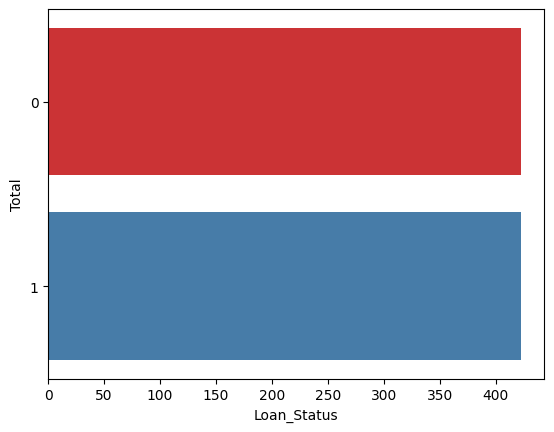

In [199]:
X = df.drop(["Loan_Status"], axis=1)#separating the target variable from independent variables
y = df["Loan_Status"]

X, y = SMOTE().fit_resample(X, y)
sns.countplot(y=y, data=df, palette="Set1")
plt.xlabel('Loan_Status')
plt.ylabel('Total')

In [200]:
X.index.size

844

we can see that by using SMOTE, it has resampled our dataset from 614 to 844 entries generating random row data to eliminate our issue of class imbalance.

 splitting our dataset into training and test set with 9:1 ratio.  
 x_train has a count of 759 while x_cv has a count of 85 rows.

In [201]:
x_train,x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.1, random_state=1)

In [202]:
x_train.index.size

759

**Model Building**

We will be using K-folds cross validation as an experimental design.
Cross-validation is a data partitioning strategy aimed at enhancing the generalizability of a model built on a dataset. This technique involves systematically splitting the data into multiple subsets to evaluate the model's performance on unseen data. By iteratively training and validating the model on different subsets, cross-validation provides insights into how well the model can perform on new, unseen data.

The first model that we are building is Logistic Regression.
Logistic Regression functions as a classification algorithm, primarily employed to forecast a binary outcome (such as 1 / 0, Yes / No, True / False) based on a set of independent variables. It is essentially an estimation of the Logit function, which represents the logarithm of the odds in favor of the event being predicted.



In [203]:
import time
k=10
kf1 = KFold(n_splits=k, random_state=1,shuffle=True)
model1 = LogisticRegression(max_iter=1000)
start_time = time.time()
model1.fit(x_train,y_train)
scores = cross_val_score(model1, X, y, scoring='accuracy', cv=kf1)
end_time = time.time()
trainning_time1 = end_time - start_time
for i in range (0,k):
    print("Fold Number: %d, Accuracy: %.3f" %(i, scores[i]))
ac1 = np.mean(scores)*100
print('Accuracy: %.3f, Standard Deviation: %.3f' % (ac1, np.std(scores)))
print('trainning time for logistic regression:',trainning_time1,"seconds")

Fold Number: 0, Accuracy: 0.859
Fold Number: 1, Accuracy: 0.835
Fold Number: 2, Accuracy: 0.835
Fold Number: 3, Accuracy: 0.824
Fold Number: 4, Accuracy: 0.905
Fold Number: 5, Accuracy: 0.798
Fold Number: 6, Accuracy: 0.881
Fold Number: 7, Accuracy: 0.857
Fold Number: 8, Accuracy: 0.845
Fold Number: 9, Accuracy: 0.833
Accuracy: 84.720, Standard Deviation: 0.029
trainning time for logistic regression: 0.860832929611206 seconds


In [204]:
pred_cv1 = model1.predict(x_cv)
ac1_test= accuracy_score(y_cv,pred_cv1)*100
pr_1test = precision_score(y_cv,pred_cv1)*100
re_1test = recall_score(y_cv,pred_cv1)*100
print(ac1_test)

87.05882352941177


Using the 10-fold cross validation, logistic regression gave us an average accuracy of 84.007% and after testing it on our test set we get an accuracy of 85.88%. It means that we have predicted almost 85.88% of the loans correctly.


Next for model two we are using Decision trees.
A decision tree is a supervised learning algorithm commonly utilized in classification problems, where a predefined target variable exists. This technique involves dividing the population or sample into two or more homogeneous sets (sub-populations) based on the most significant splitter or differentiator among input variables.
Decision trees employ various algorithms to determine how to split a node into two or more sub-nodes. This process of creating sub-nodes enhances the homogeneity of the resulting sub-nodes. Essentially, the purity of the node increases concerning the target variable as a result of this division.

Fold Number: 0, Accuracy: 0.824
Fold Number: 1, Accuracy: 0.859
Fold Number: 2, Accuracy: 0.706
Fold Number: 3, Accuracy: 0.718
Fold Number: 4, Accuracy: 0.821
Fold Number: 5, Accuracy: 0.798
Fold Number: 6, Accuracy: 0.774
Fold Number: 7, Accuracy: 0.774
Fold Number: 8, Accuracy: 0.774
Fold Number: 9, Accuracy: 0.857
Accuracy: 79.035, Standard Deviation: 0.050
trainning time for decision tree: 0.09826087951660156 seconds


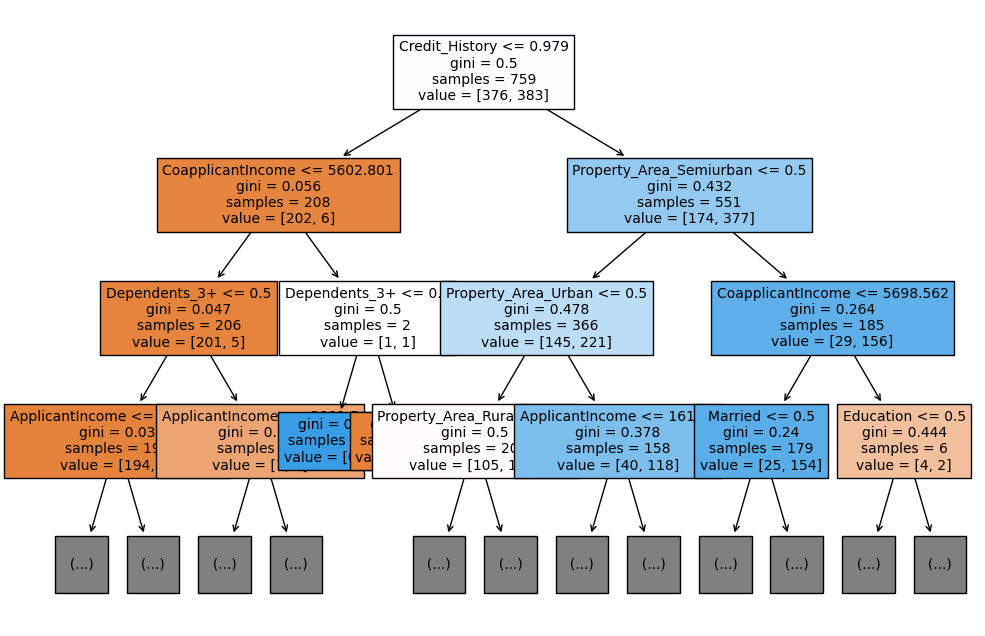

In [205]:
k=10
kf2 = KFold(n_splits=k, random_state=1,shuffle=True)
model2 = DecisionTreeClassifier()
start_time = time.time()
clf = model2.fit(x_train, y_train)
scores = cross_val_score(model2, X, y, scoring='accuracy', cv=kf2)
end_time = time.time()
trainning_time2 = end_time - start_time
for i in range (0,k):
    print("Fold Number: %d, Accuracy: %.3f" %(i, scores[i]))
ac2 = np.mean(scores)*100
print('Accuracy: %.3f, Standard Deviation: %.3f' % (ac2, np.std(scores)))
print('trainning time for decision tree:',trainning_time2,"seconds")
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True,feature_names=X.columns,fontsize=10, max_depth=3)
plt.show()

In [206]:
pred_cv2 = model2.predict(x_cv)
ac2_test=accuracy_score(y_cv,pred_cv2)*100
pr_2test = precision_score(y_cv,pred_cv2)*100
re_2test = recall_score(y_cv,pred_cv2)*100
print(ac2_test)

81.17647058823529


we can see that the average accuracy for decision tress using k fold cross validation was 77.370% and it only increased minimally on the test set to 77.647% only.

The third model we are using is K nearest neighbors.
In KNN classification, the prediction for a new data point is determined by the majority class of its K nearest neighbors in the feature space. The value of K is a hyperparameter that needs to be specified prior to training the model. Typically, the class labels of the K nearest neighbors are determined based on a distance metric, such as Euclidean distance or Manhattan distance.here we are using the value of n as 8 initially.  

In [207]:
k=10
kf3 = KFold(n_splits=k, random_state=1,shuffle=True)
model3 = KNeighborsClassifier(n_neighbors=8, metric="euclidean")
start_time = time.time()
model3.fit(x_train, y_train)
scores = cross_val_score(model3, X, y, scoring='accuracy', cv=kf3)
end_time = time.time()
trainning_time3 = end_time - start_time
for i in range (0,k):
    print("Fold Number: %d, Accuracy: %.3f" %(i, scores[i]))
ac3 = np.mean(scores)*100
print('Accuracy: %.3f, Standard Deviation: %.3f' % (ac3, np.std(scores)))
print('trainning time for KNN:',trainning_time3,"seconds")

Fold Number: 0, Accuracy: 0.706
Fold Number: 1, Accuracy: 0.647
Fold Number: 2, Accuracy: 0.671
Fold Number: 3, Accuracy: 0.553
Fold Number: 4, Accuracy: 0.607
Fold Number: 5, Accuracy: 0.619
Fold Number: 6, Accuracy: 0.655
Fold Number: 7, Accuracy: 0.667
Fold Number: 8, Accuracy: 0.690
Fold Number: 9, Accuracy: 0.631
Accuracy: 64.455, Standard Deviation: 0.042
trainning time for KNN: 0.12091898918151855 seconds


In [208]:
pred_cv3 = model3.predict(x_cv)
ac3_test=accuracy_score(y_cv, pred_cv3)*100
pr_3test = precision_score(y_cv,pred_cv3)*100
re_3test = recall_score(y_cv,pred_cv3)*100
print(ac3_test)

70.58823529411765


The average accuracy of KNN using crossfold is 63.034% and it shows that our model predicts almost 65.88% of the loans correctly on the test set.

In [209]:
data = {
    'Classifier': ['Logistic regression', 'Decision tree', 'KNN'],
    'k fold mean accuracy': [ac1, ac2, ac3],
    'accuracy on test set': [ac1_test, ac2_test, ac3_test]
}
print(tabulate(data, headers='keys', tablefmt='grid'))

+---------------------+------------------------+------------------------+
| Classifier          |   k fold mean accuracy |   accuracy on test set |
+=====================+========================+========================+
| Logistic regression |                84.7199 |                87.0588 |
+---------------------+------------------------+------------------------+
| Decision tree       |                79.035  |                81.1765 |
+---------------------+------------------------+------------------------+
| KNN                 |                64.4552 |                70.5882 |
+---------------------+------------------------+------------------------+


We can see from the table above that Logistic regression outperforms KNN and decision trees on the basis of accuracy. Logistic regression gives us the best accuracy following decision trees and then KNN.



In [210]:
data = {
    'Classifier': ['Logistic regression', 'Decision tree', 'KNN'],
    'accuracy on test set':[ac1_test, ac2_test, ac3_test],
    'precision on test set': [pr_1test,pr_2test,pr_3test],
    'recall on test set': [re_1test,re_2test,re_3test]
}
print(tabulate(data, headers='keys', tablefmt='grid'))

+---------------------+------------------------+-------------------------+----------------------+
| Classifier          |   accuracy on test set |   precision on test set |   recall on test set |
+=====================+========================+=========================+======================+
| Logistic regression |                87.0588 |                 80.4348 |              94.8718 |
+---------------------+------------------------+-------------------------+----------------------+
| Decision tree       |                81.1765 |                 76.7442 |              84.6154 |
+---------------------+------------------------+-------------------------+----------------------+
| KNN                 |                70.5882 |                 71.875  |              58.9744 |
+---------------------+------------------------+-------------------------+----------------------+


In [211]:
data = {
    'Classifier': ['Logistic regression', 'Decision tree', 'KNN'],
    'trainning time in seconds': [trainning_time1,trainning_time2,trainning_time3],
}
print(tabulate(data, headers='keys', tablefmt='grid'))

+---------------------+-----------------------------+
| Classifier          |   trainning time in seconds |
+=====================+=============================+
| Logistic regression |                   0.860833  |
+---------------------+-----------------------------+
| Decision tree       |                   0.0982609 |
+---------------------+-----------------------------+
| KNN                 |                   0.120919  |
+---------------------+-----------------------------+


In [212]:
logistic_regression = classification_report(y_cv, pred_cv1)
decision_trees = classification_report(y_cv, pred_cv2)
KNN = classification_report(y_cv, pred_cv3)

# Print classification reports
print("Classification Report for Logistic regression:")
print(logistic_regression)

print("\nClassification Report for Decision tree:")
print(decision_trees)

print("\nClassification Report for KNN:")
print(KNN)

Classification Report for Logistic regression:
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        46
           1       0.80      0.95      0.87        39

    accuracy                           0.87        85
   macro avg       0.88      0.88      0.87        85
weighted avg       0.88      0.87      0.87        85


Classification Report for Decision tree:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        46
           1       0.77      0.85      0.80        39

    accuracy                           0.81        85
   macro avg       0.81      0.81      0.81        85
weighted avg       0.82      0.81      0.81        85


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        46
           1       0.72      0.59      0.65        39

    accuracy                           0.71        85
   macr

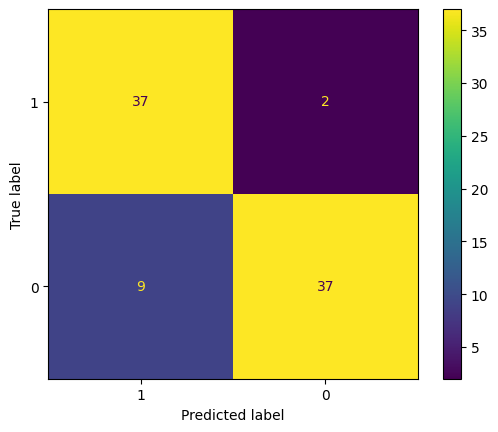

In [213]:
cm1 = confusion_matrix(y_cv,pred_cv1)
cm1_flipped = cm1[::-1, ::-1]
class_names = ['1', '0']
cm1_disp = ConfusionMatrixDisplay(confusion_matrix = cm1_flipped,display_labels=class_names)
cm1_disp.plot()
plt.grid(False)

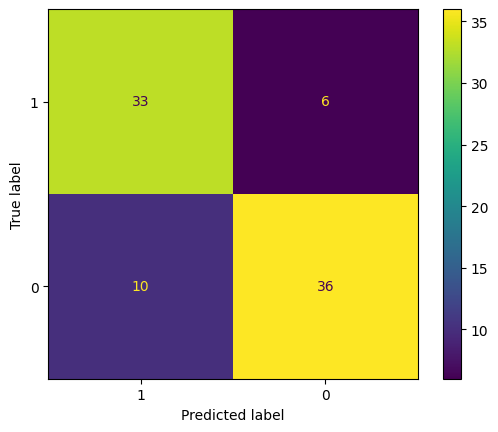

In [214]:
cm2 = confusion_matrix(y_cv,pred_cv2)
cm2_flipped = cm2[::-1, ::-1]
class_names = ['1', '0']
cm2_disp = ConfusionMatrixDisplay(confusion_matrix = cm2_flipped,display_labels=class_names)
cm2_disp.plot()
plt.grid(False)

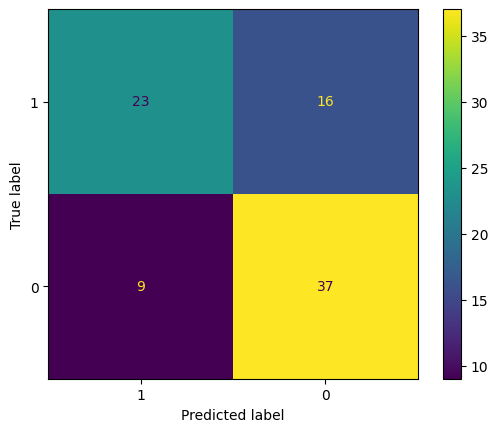

In [215]:
cm3 = confusion_matrix(y_cv,pred_cv3)
cm3_flipped = cm3[::-1, ::-1]
class_names = ['1', '0']
cm3_disp = ConfusionMatrixDisplay(confusion_matrix = cm3_flipped,display_labels=class_names)
cm3_disp.plot()
plt.grid(False)

Various methods exist for selecting the optimal features for a logistic regression model. here we are using the weights of the attributes or coefficients to check which attributes holds importance for building logistic regression model.

In [216]:
coefficients = model1.coef_[0]
feature_names = X.columns.tolist()
feature_coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_coefficients = feature_coefficients.reindex(feature_coefficients['Coefficient'].abs().sort_values(ascending=False).index)
print("Feature Importance:")
print(feature_coefficients)

Feature Importance:
                    Feature  Coefficient
4            Credit_History     3.926441
14  Property_Area_Semiurban     2.626313
15      Property_Area_Urban     1.789524
9              Dependents_2     1.602079
7              Dependents_0     1.393787
13      Property_Area_Rural     1.372965
10            Dependents_3+     1.317940
8              Dependents_1     0.929085
6                   Married     0.566807
12            Self_Employed     0.478901
11                Education     0.341938
5                    Gender     0.155086
3          Loan_Amount_Term    -0.017974
2                LoanAmount    -0.005845
1         CoapplicantIncome     0.000065
0           ApplicantIncome     0.000057


<Axes: >

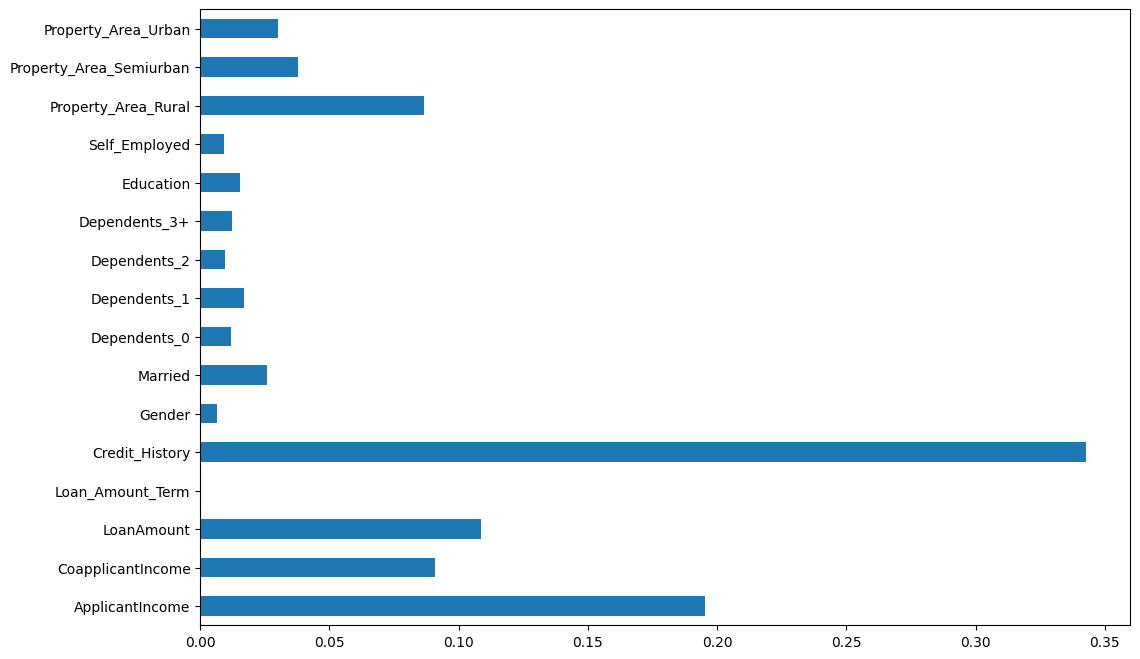

In [217]:
importances=pd.Series(model2.feature_importances_, index=feature_names)
importances.plot(kind='barh', figsize=(12,8))